# Imports

In [1]:
from ebay_delivery_prediction_project import preprocessing, Visualisation, preprocessing_models, postprocessing
preprocessing.import_test()

from datetime import datetime, timedelta

Preprocessing successfully imported.


In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [3]:
training_data = preprocessing.read_data(rows_to_read = 100000, columns_with_type = ['item_zip', 'buyer_zip'], dtype_col=[str, str])["train"]
print(training_data.columns)

Reading 100000 rows.
Reading all columns.
Index(['b2c_c2c', 'seller_id', 'declared_handling_days',
       'acceptance_scan_timestamp', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate', 'item_zip', 'buyer_zip',
       'category_id', 'item_price', 'quantity', 'payment_datetime',
       'delivery_date', 'weight', 'weight_units', 'package_size',
       'record_number'],
      dtype='object')


In [4]:
print(len(training_data.columns))

19


# Basic Preprocessing

In [5]:
training_data = preprocessing.basic_preprocessing(training_data)

In [6]:
training_data.shape

(100000, 20)

In [7]:
len(training_data.columns)

20

In [8]:
print(training_data.columns)

Index(['b2c_c2c', 'seller_id', 'declared_handling_days',
       'acceptance_scan_timestamp', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate', 'item_zip', 'buyer_zip',
       'category_id', 'item_price', 'quantity', 'payment_datetime',
       'delivery_date', 'weight', 'weight_units', 'package_size',
       'record_number', 'delivery_calendar_days'],
      dtype='object')


## delivery_date

In [9]:
training_data = preprocessing.expand_datetime(df = training_data, date_column="delivery_date")

In [10]:
print(training_data.columns)

Index(['b2c_c2c', 'seller_id', 'declared_handling_days',
       'acceptance_scan_timestamp', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate', 'item_zip', 'buyer_zip',
       'category_id', 'item_price', 'quantity', 'payment_datetime',
       'delivery_date', 'weight', 'weight_units', 'package_size',
       'record_number', 'delivery_calendar_days', 'delivery_date_year',
       'delivery_date_month', 'delivery_date_week', 'delivery_date_weekday',
       'delivery_date_day_of_year'],
      dtype='object')


In [11]:
training_data["delivery_date_weekday"].value_counts()

1    22895
4    19587
5    18175
6    15595
3    15506
2     7769
7      473
Name: delivery_date_weekday, dtype: int64

Insights : 
1. Packages almost never deliver on sunday.
2. Packages rarely deliver on Saturday.

**Weekday is very important.**

## Payment Datetime

In [12]:
training_data = preprocessing.expand_datetime(df = training_data, date_column="payment_datetime")

In [13]:
training_data["delivery_date"][8].isocalendar()

(2019, 42, 2)

In [14]:
training_data["payment_datetime_weekday"].value_counts()

1    15210
7    14953
4    14242
2    14237
3    14117
5    14033
6    13208
Name: payment_datetime_weekday, dtype: int64

## delivery_calendar_days

In [15]:
histogram_array = [0 for ele in range(101)]
for ind, value in zip(training_data["delivery_calendar_days"].value_counts().index, training_data["delivery_calendar_days"].value_counts().values):
    print(ind)
    histogram_array[ind] = value

4
3
5
6
2
7
8
9
10
11
12
1
13
14
15
16
17
18
19
20
21
22
0
23
26
25
24
28
29
27
30
36
31
42
32
34
92
53
48
60
40
39
37
33
35
41
38
45
91
43
46
49
47
85
44
74
59
89
55
61
78
97
51
65
79
52
95
81
67
94
75
80
54
82
58
69
76
101


IndexError: list assignment index out of range

<AxesSubplot:xlabel='delivery_calendar_days', ylabel='Count'>

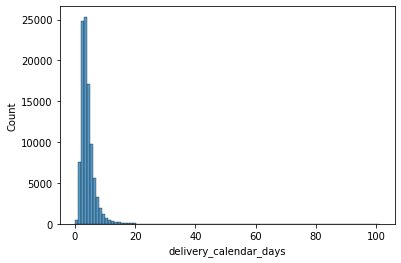

In [16]:
import seaborn as sns

sns.histplot(training_data, x = "delivery_calendar_days", bins = 100)

In [17]:
(training_data["delivery_calendar_days"]>14).sum()

968

In [18]:
(training_data["delivery_calendar_days"]<2).sum()

446

# Checking for null values

In [19]:
training_data.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,...,delivery_date_year,delivery_date_month,delivery_date_week,delivery_date_weekday,delivery_date_day_of_year,payment_datetime_year,payment_datetime_month,payment_datetime_week,payment_datetime_weekday,payment_datetime_day_of_year
0,B2C,25454,3.0,2019-03-26 15:11:00-07:00,0,0.0,3,5,97219,49040,...,2019,3,13,5,96,2019,3,12,7,91
1,C2C,6727381,2.0,2018-06-02 12:53:00-07:00,0,3.0,3,5,11415-3528,62521,...,2018,6,23,2,163,2018,6,22,5,159
2,B2C,18507,1.0,2019-01-07 16:22:00-05:00,0,4.5,3,5,27292,53010,...,2019,1,2,4,18,2019,1,1,7,14
3,B2C,4677,1.0,2018-12-17 16:56:00-08:00,0,0.0,3,5,90703,80022,...,2018,12,51,5,362,2018,12,50,7,357
4,B2C,4677,1.0,2018-07-27 16:48:00-07:00,0,0.0,3,5,90703,55070,...,2018,7,31,1,218,2018,7,30,4,214


In [20]:
training_data.isnull().sum()

b2c_c2c                            0
seller_id                          0
declared_handling_days          4958
acceptance_scan_timestamp          0
shipment_method_id                 0
shipping_fee                       0
carrier_min_estimate               0
carrier_max_estimate               0
item_zip                           0
buyer_zip                          0
category_id                        0
item_price                         0
quantity                           0
payment_datetime                   0
delivery_date                      0
weight                             0
weight_units                       0
package_size                       0
record_number                      0
delivery_calendar_days             0
delivery_date_year                 0
delivery_date_month                0
delivery_date_week                 0
delivery_date_weekday              0
delivery_date_day_of_year          0
payment_datetime_year              0
payment_datetime_month             0
p

In [21]:
# Remove the rows in which null values are present
training_data = training_data.dropna()

In [22]:
training_data.isnull().sum()

b2c_c2c                         0
seller_id                       0
declared_handling_days          0
acceptance_scan_timestamp       0
shipment_method_id              0
shipping_fee                    0
carrier_min_estimate            0
carrier_max_estimate            0
item_zip                        0
buyer_zip                       0
category_id                     0
item_price                      0
quantity                        0
payment_datetime                0
delivery_date                   0
weight                          0
weight_units                    0
package_size                    0
record_number                   0
delivery_calendar_days          0
delivery_date_year              0
delivery_date_month             0
delivery_date_week              0
delivery_date_weekday           0
delivery_date_day_of_year       0
payment_datetime_year           0
payment_datetime_month          0
payment_datetime_week           0
payment_datetime_weekday        0
payment_dateti

# Check the values of carrier_min_estimate and carrier_max_estimate for negative values as they indicate missing values

In [23]:
training_data['carrier_min_estimate'].value_counts()

 3    58980
 2    35992
 1       53
-1        9
 0        5
 6        3
Name: carrier_min_estimate, dtype: int64

In [24]:
training_data['carrier_max_estimate'].value_counts()

 5     82171
 9      7333
 8      5468
 1        58
-1         9
 25        3
Name: carrier_max_estimate, dtype: int64

In [25]:
training_data['package_size'].value_counts()

PACKAGE_THICK_ENVELOPE    80022
NONE                       6866
LETTER                     5604
LARGE_ENVELOPE             1445
LARGE_PACKAGE              1105
Name: package_size, dtype: int64

In [26]:
def removeMissingValues(data, column, missing_val):
    row_names = data[data[column] == missing_val].index
    data.drop(row_names, inplace=True)
    print("Number of Rows dropped: ",len(row_names))
    return data

In [27]:
training_data.shape

(95042, 30)

In [28]:
training_data = removeMissingValues(training_data, 'carrier_min_estimate', -1)

Number of Rows dropped:  9


In [29]:
training_data = removeMissingValues(training_data, 'carrier_max_estimate', -1)

Number of Rows dropped:  0


In [30]:
training_data = removeMissingValues(training_data, 'package_size', 'NONE')

Number of Rows dropped:  6864


In [31]:
training_data.shape

(88169, 30)

In [32]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
seller_id,88169.0,292783.451791,699471.797625,0.00,6780.00,45655.00,231482.00,7253892.0
declared_handling_days,88169.0,1.633851,1.510010,0.00,1.00,1.00,2.00,30.0
shipment_method_id,88169.0,0.853735,1.655663,0.00,0.00,0.00,1.00,24.0
shipping_fee,88169.0,2.904029,5.535058,0.00,0.00,0.00,4.06,200.0
carrier_min_estimate,88169.0,2.632059,0.483845,0.00,2.00,3.00,3.00,6.0
carrier_max_estimate,88169.0,5.405823,1.166160,1.00,5.00,5.00,5.00,25.0
category_id,88169.0,6.647677,6.514412,0.00,1.00,5.00,10.00,32.0
item_price,88169.0,36.706276,92.442396,0.01,8.99,15.98,32.00,7000.0
quantity,88169.0,1.106557,0.766480,1.00,1.00,1.00,1.00,50.0
weight,88169.0,16.642595,51.020011,0.00,0.00,5.00,16.00,7040.0


# Checking for duplicate values 

In [33]:
duplicates = training_data.duplicated()
duplicates.sum()

0

# Remove columns with only one unique value

In [34]:
unique = training_data.nunique()
unique = unique[unique.values == 1]
print(list(unique.index))

['weight_units']


In [35]:
training_data['weight_units'].value_counts()

1    88169
Name: weight_units, dtype: int64

In [36]:
training_data = training_data.drop(columns=list(unique.index))

In [37]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88169 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   b2c_c2c                       88169 non-null  object        
 1   seller_id                     88169 non-null  int64         
 2   declared_handling_days        88169 non-null  float64       
 3   acceptance_scan_timestamp     88169 non-null  object        
 4   shipment_method_id            88169 non-null  int64         
 5   shipping_fee                  88169 non-null  float64       
 6   carrier_min_estimate          88169 non-null  int64         
 7   carrier_max_estimate          88169 non-null  int64         
 8   item_zip                      88169 non-null  object        
 9   buyer_zip                     88169 non-null  object        
 10  category_id                   88169 non-null  int64         
 11  item_price                  

# Remove columns that seems to be irrelevant

In [38]:
columns_to_remove = ['item_price', 'record_number']

In [39]:
training_data = training_data.drop(columns=list(columns_to_remove))

In [40]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88169 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   b2c_c2c                       88169 non-null  object        
 1   seller_id                     88169 non-null  int64         
 2   declared_handling_days        88169 non-null  float64       
 3   acceptance_scan_timestamp     88169 non-null  object        
 4   shipment_method_id            88169 non-null  int64         
 5   shipping_fee                  88169 non-null  float64       
 6   carrier_min_estimate          88169 non-null  int64         
 7   carrier_max_estimate          88169 non-null  int64         
 8   item_zip                      88169 non-null  object        
 9   buyer_zip                     88169 non-null  object        
 10  category_id                   88169 non-null  int64         
 11  quantity                    

# Univariate analysis

# Outliers

In [47]:
def showBoxPlot(data, columns):
    for col in columns:
        training_data.boxplot(column=col)
        plt.show()

In [48]:
training_data['carrier_max_estimate'].value_counts()

5     78216
9      6193
8      3711
1        46
25        3
Name: carrier_max_estimate, dtype: int64

In [49]:
training_data['carrier_min_estimate'].value_counts()

3    55764
2    32356
1       44
6        3
0        2
Name: carrier_min_estimate, dtype: int64

In [50]:
training_data['declared_handling_days'].value_counts()

1.0     47155
2.0     16252
3.0     15496
0.0      6586
5.0      1377
4.0       717
10.0      381
15.0       87
30.0       68
20.0       50
Name: declared_handling_days, dtype: int64

In [51]:
numerical_columns = ['declared_handling_days', 'carrier_min_estimate', 'carrier_max_estimate']

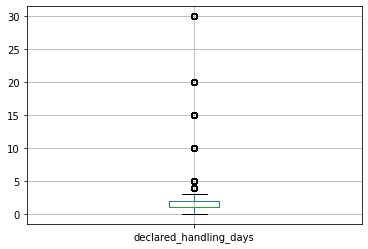

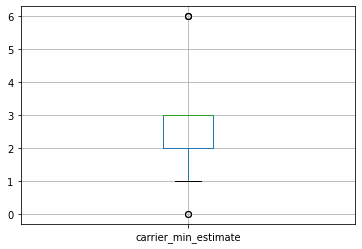

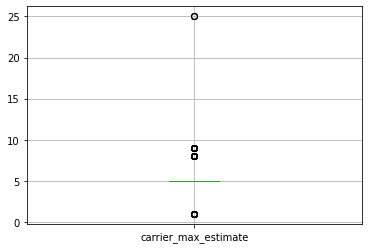

In [52]:
showBoxPlot(training_data, numerical_columns)

array([[<AxesSubplot:title={'center':'b2c_c2c'}>,
        <AxesSubplot:title={'center':'seller_id'}>,
        <AxesSubplot:title={'center':'declared_handling_days'}>,
        <AxesSubplot:title={'center':'shipment_method_id'}>,
        <AxesSubplot:title={'center':'shipping_fee'}>],
       [<AxesSubplot:title={'center':'carrier_min_estimate'}>,
        <AxesSubplot:title={'center':'carrier_max_estimate'}>,
        <AxesSubplot:title={'center':'category_id'}>,
        <AxesSubplot:title={'center':'quantity'}>,
        <AxesSubplot:title={'center':'delivery_date'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'package_size'}>,
        <AxesSubplot:title={'center':'delivery_calendar_days'}>,
        <AxesSubplot:title={'center':'delivery_date_year'}>,
        <AxesSubplot:title={'center':'delivery_date_month'}>],
       [<AxesSubplot:title={'center':'delivery_date_week'}>,
        <AxesSubplot:title={'center':'delivery_date_weekday'}>,
        <A

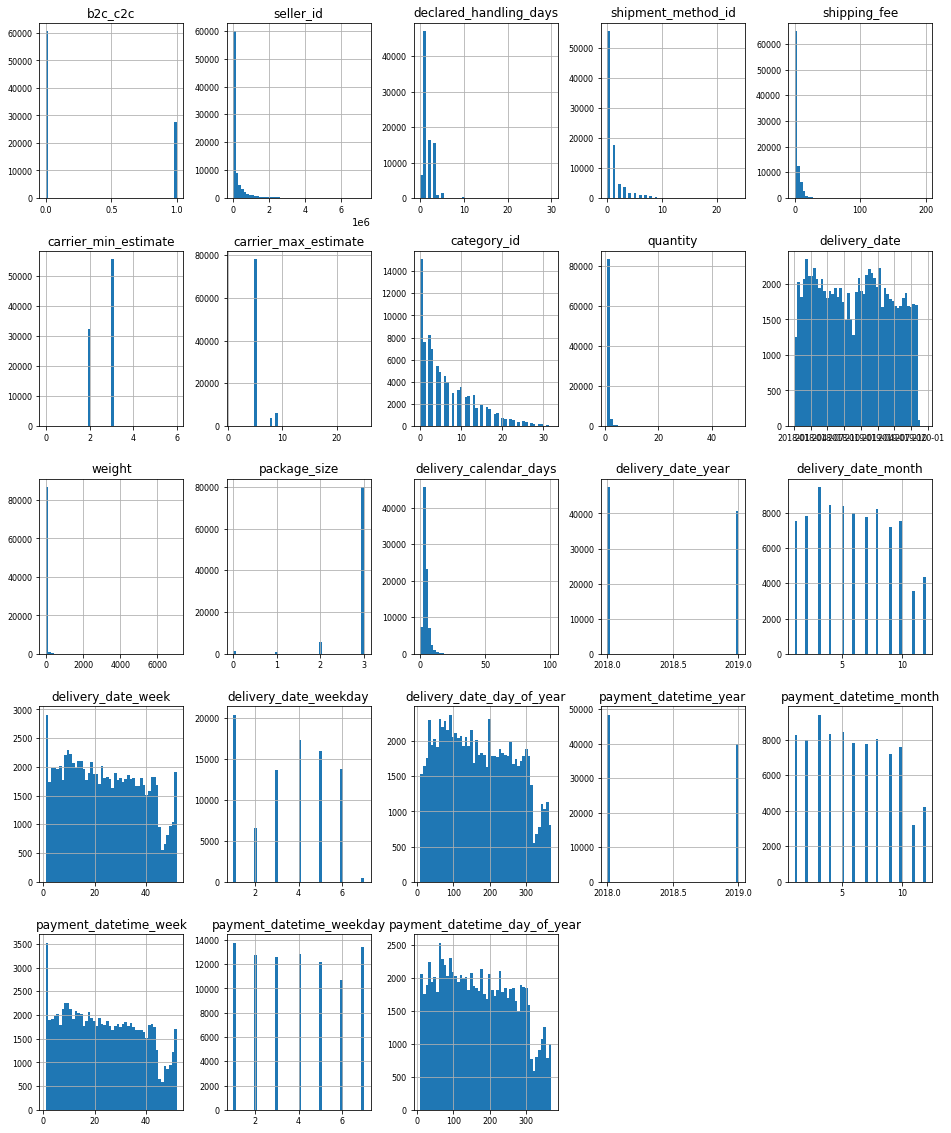

In [53]:
training_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Find invalid values in item_zip and buyer_zip

In [54]:
def stripUnwantedSpace(data, col):
    col_values_to_change = data[col]
    long_zip_codes = col_values_to_change.str.len() > 10
    for val in col_values_to_change[long_zip_codes]:
        val.replace(" ", "")
    training_data[col] = col_values_to_change
    return training_data

In [55]:
def removeZipCodesWithOnlyZeros(data, col):
    targetCol = data[col]
    length_less_than_min = targetCol.str.len() < 5
    
#     training_data[length_less_than_min]

In [56]:
# removeZipCodesWithOnlyZeros(training_data, 'item_zip')

In [57]:
small_zip_codes = training_data['item_zip'].str.len() < 5
training_data['item_zip'][small_zip_codes]

12948     000
13007     000
16325     000
17725     000
18050     000
21764     000
34274     000
34362     000
36697     000
36701    1012
39805     000
40901     000
45259     000
50931    1020
54933     000
59835      深圳
62067     000
67235     000
68011     000
70433     000
70928     000
71475     000
74897    0000
74898    0000
74940    0755
98721    1000
99085     000
Name: item_zip, dtype: object

In [58]:
small_zip_codes = training_data['buyer_zip'].str.len() < 5
training_data['buyer_zip'][small_zip_codes]

261      000
318      000
561      000
597      000
760      000
        ... 
99085    000
99104    000
99118    000
99202    000
99569    000
Name: buyer_zip, Length: 454, dtype: object

In [59]:
long_zip_codes = training_data['buyer_zip'].str.len() > 10
training_data['buyer_zip'][long_zip_codes]

Series([], Name: buyer_zip, dtype: object)

In [60]:
long_zip_codes = training_data['item_zip'].str.len() > 10
training_data['item_zip'][long_zip_codes]

Series([], Name: item_zip, dtype: object)

In [61]:
training_data.shape

(88169, 27)

In [ ]:
# Have to find a way to handle these incomplete data

In [62]:
# training_data = stripUnwantedSpace(training_data, 'item_zip')

In [63]:
# training_data.shape

# Heat map

/tmp/ipykernel_14267/3118446978.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

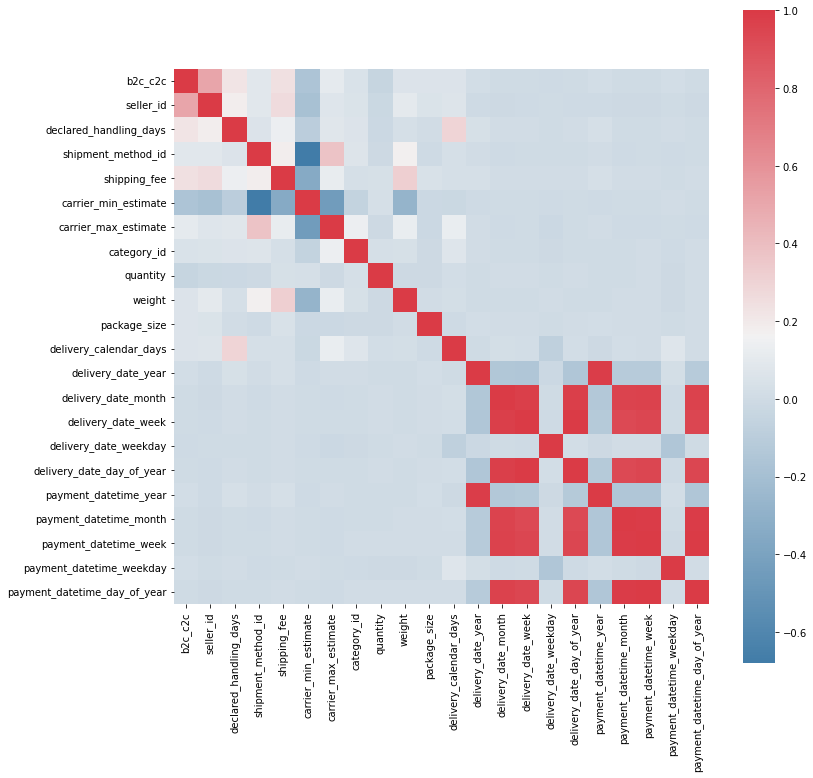

In [132]:
f, ax = plt.subplots(figsize=(12, 12))
corr = training_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [135]:
# Column b2c_c2c and seller_id are highly correlated
# Dropping seller_id
training_data = training_data.drop(columns=['seller_id'])

# Pair plot 

In [136]:
training_data.columns

Index(['b2c_c2c', 'declared_handling_days', 'acceptance_scan_timestamp',
       'shipment_method_id', 'shipping_fee', 'carrier_min_estimate',
       'carrier_max_estimate', 'item_zip', 'buyer_zip', 'category_id',
       'quantity', 'payment_datetime', 'delivery_date', 'weight',
       'package_size', 'delivery_calendar_days', 'delivery_date_year',
       'delivery_date_month', 'delivery_date_week', 'delivery_date_weekday',
       'delivery_date_day_of_year', 'payment_datetime_year',
       'payment_datetime_month', 'payment_datetime_week',
       'payment_datetime_weekday', 'payment_datetime_day_of_year'],
      dtype='object')

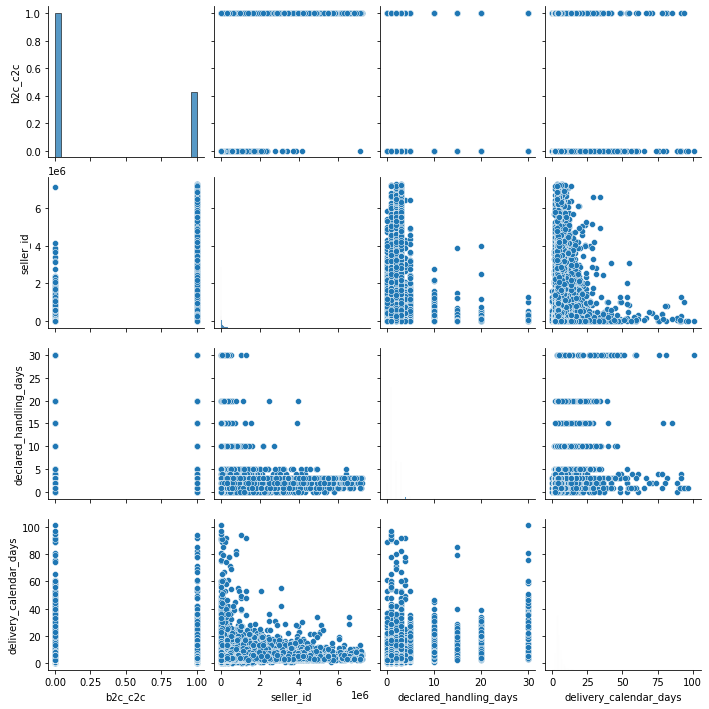

In [66]:
sns.pairplot(training_data[['b2c_c2c', 'seller_id', 'declared_handling_days',
       'acceptance_scan_timestamp', 'delivery_calendar_days']])

# Remove data and time variables

In [137]:
training_data.columns

Index(['b2c_c2c', 'declared_handling_days', 'acceptance_scan_timestamp',
       'shipment_method_id', 'shipping_fee', 'carrier_min_estimate',
       'carrier_max_estimate', 'item_zip', 'buyer_zip', 'category_id',
       'quantity', 'payment_datetime', 'delivery_date', 'weight',
       'package_size', 'delivery_calendar_days', 'delivery_date_year',
       'delivery_date_month', 'delivery_date_week', 'delivery_date_weekday',
       'delivery_date_day_of_year', 'payment_datetime_year',
       'payment_datetime_month', 'payment_datetime_week',
       'payment_datetime_weekday', 'payment_datetime_day_of_year'],
      dtype='object')

In [138]:
data_time_var = ['delivery_date_year', 'delivery_date_month', 'delivery_date_week',
       'delivery_date_weekday', 'delivery_date_day_of_year',
       'payment_datetime_year', 'payment_datetime_month',
       'payment_datetime_week', 'payment_datetime_weekday',
       'payment_datetime_day_of_year','payment_datetime', 'delivery_date', 'acceptance_scan_timestamp']

In [139]:
columns_without_datetime = list(set(training_data.columns) - set(data_time_var))

In [140]:
print(columns_without_datetime, len(columns_without_datetime))

['carrier_max_estimate', 'carrier_min_estimate', 'buyer_zip', 'quantity', 'item_zip', 'shipment_method_id', 'category_id', 'shipping_fee', 'weight', 'package_size', 'b2c_c2c', 'declared_handling_days', 'delivery_calendar_days'] 13


# Handle categorical values

In [141]:
training_data.head(5)

,b2c_c2c,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,...,delivery_date_year,delivery_date_month,delivery_date_week,delivery_date_weekday,delivery_date_day_of_year,payment_datetime_year,payment_datetime_month,payment_datetime_week,payment_datetime_weekday,payment_datetime_day_of_year
0,0,3.0,2019-03-26 15:11:00-07:00,0,0.0,3,5,97219,49040,13,...,2019,3,13,5,96,2019,3,12,7,91
1,1,2.0,2018-06-02 12:53:00-07:00,0,3.0,3,5,11415-3528,62521,0,...,2018,6,23,2,163,2018,6,22,5,159
2,0,1.0,2019-01-07 16:22:00-05:00,0,4.5,3,5,27292,53010,1,...,2019,1,2,4,18,2019,1,1,7,14
3,0,1.0,2018-12-17 16:56:00-08:00,0,0.0,3,5,90703,80022,1,...,2018,12,51,5,362,2018,12,50,7,357
4,0,1.0,2018-07-27 16:48:00-07:00,0,0.0,3,5,90703,55070,1,...,2018,7,31,1,218,2018,7,30,4,214


In [142]:
def plotCategoricalValues(columns):
    for col in columns:
        training_data[col].value_counts().plot(kind='bar')
        plt.ylabel(col)
        plt.show()

In [143]:
categorical_values = ['b2c_c2c', 'package_size']

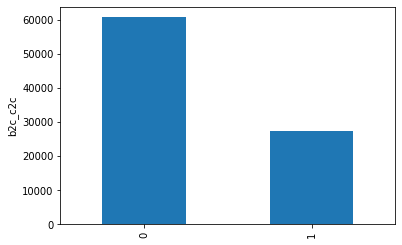

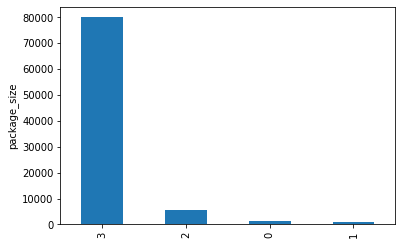

In [144]:
plotCategoricalValues(categorical_values)

In [145]:
le = LabelEncoder() 
training_data[categorical_values] = training_data[categorical_values].apply(lambda col: le.fit_transform(col)) 
training_data.head(5)

,b2c_c2c,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,...,delivery_date_year,delivery_date_month,delivery_date_week,delivery_date_weekday,delivery_date_day_of_year,payment_datetime_year,payment_datetime_month,payment_datetime_week,payment_datetime_weekday,payment_datetime_day_of_year
0,0,3.0,2019-03-26 15:11:00-07:00,0,0.0,3,5,97219,49040,13,...,2019,3,13,5,96,2019,3,12,7,91
1,1,2.0,2018-06-02 12:53:00-07:00,0,3.0,3,5,11415-3528,62521,0,...,2018,6,23,2,163,2018,6,22,5,159
2,0,1.0,2019-01-07 16:22:00-05:00,0,4.5,3,5,27292,53010,1,...,2019,1,2,4,18,2019,1,1,7,14
3,0,1.0,2018-12-17 16:56:00-08:00,0,0.0,3,5,90703,80022,1,...,2018,12,51,5,362,2018,12,50,7,357
4,0,1.0,2018-07-27 16:48:00-07:00,0,0.0,3,5,90703,55070,1,...,2018,7,31,1,218,2018,7,30,4,214


In [146]:
training_data.columns

Index(['b2c_c2c', 'declared_handling_days', 'acceptance_scan_timestamp',
       'shipment_method_id', 'shipping_fee', 'carrier_min_estimate',
       'carrier_max_estimate', 'item_zip', 'buyer_zip', 'category_id',
       'quantity', 'payment_datetime', 'delivery_date', 'weight',
       'package_size', 'delivery_calendar_days', 'delivery_date_year',
       'delivery_date_month', 'delivery_date_week', 'delivery_date_weekday',
       'delivery_date_day_of_year', 'payment_datetime_year',
       'payment_datetime_month', 'payment_datetime_week',
       'payment_datetime_weekday', 'payment_datetime_day_of_year'],
      dtype='object')

# Handle discrete features

In [147]:
discrete_columns = [col for col in columns_without_datetime if len(training_data[col].unique()) < 25]
print(discrete_columns, len(discrete_columns))

['carrier_max_estimate', 'carrier_min_estimate', 'shipment_method_id', 'package_size', 'b2c_c2c', 'declared_handling_days'] 6


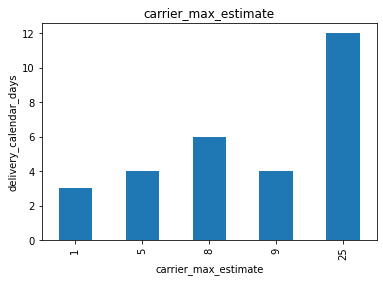

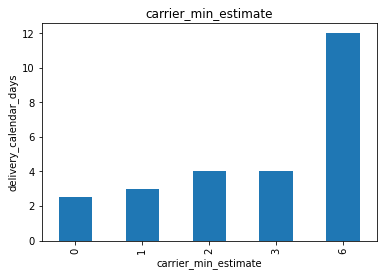

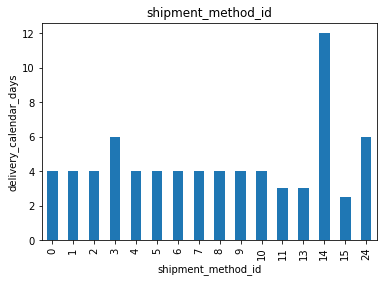

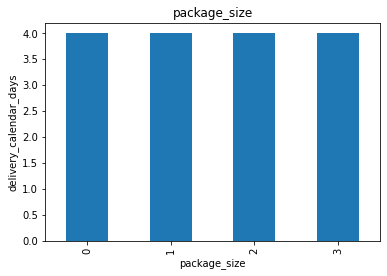

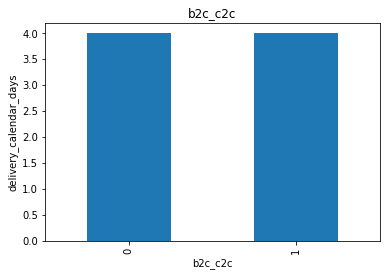

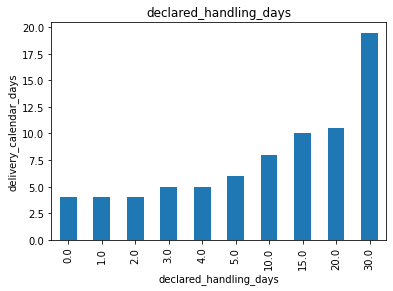

In [148]:
for col in discrete_columns:
    data = training_data.copy()
    data.groupby(col)['delivery_calendar_days'].median().plot.bar()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('delivery_calendar_days')
    plt.show()

# Handle continuous features

In [149]:
continous_feature = list(set(columns_without_datetime) - set(discrete_columns))

In [150]:
continous_feature

['buyer_zip',
 'quantity',
 'item_zip',
 'category_id',
 'shipping_fee',
 'weight',
 'delivery_calendar_days']

/home/monisha/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28145 (\N{CJK UNIFIED IDEOGRAPH-6DF1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/monisha/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22323 (\N{CJK UNIFIED IDEOGRAPH-5733}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


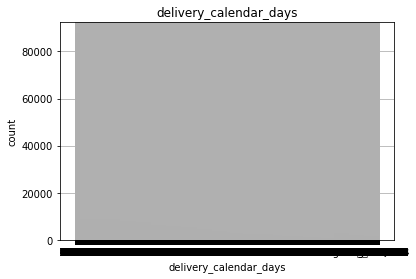

In [151]:
for col in continous_feature:
#     print(col)
    data = training_data.copy()
    data[col].hist(bins=20)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(col)
    plt.show

# Correlation

In [113]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88169 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   b2c_c2c                       88169 non-null  int64         
 1   seller_id                     88169 non-null  int64         
 2   declared_handling_days        88169 non-null  float64       
 3   acceptance_scan_timestamp     88169 non-null  object        
 4   shipment_method_id            88169 non-null  int64         
 5   shipping_fee                  88169 non-null  float64       
 6   carrier_min_estimate          88169 non-null  int64         
 7   carrier_max_estimate          88169 non-null  int64         
 8   item_zip                      88169 non-null  object        
 9   buyer_zip                     88169 non-null  object        
 10  category_id                   88169 non-null  int64         
 11  quantity                    

In [114]:
num_corr = training_data.corr()['delivery_calendar_days']
num_corr

b2c_c2c                         0.058281
seller_id                       0.067204
declared_handling_days          0.292689
shipment_method_id              0.027302
shipping_fee                    0.024448
carrier_min_estimate           -0.029442
carrier_max_estimate            0.123699
category_id                     0.075236
quantity                        0.015641
weight                          0.017678
package_size                   -0.009675
delivery_calendar_days          1.000000
delivery_date_year              0.000363
delivery_date_month             0.016480
delivery_date_week              0.015859
delivery_date_weekday          -0.078491
delivery_date_day_of_year       0.014436
payment_datetime_year          -0.013767
payment_datetime_month          0.010231
payment_datetime_week           0.007694
payment_datetime_weekday        0.072075
payment_datetime_day_of_year    0.009179
Name: delivery_calendar_days, dtype: float64

In [115]:
correlated_features_list = num_corr[abs(num_corr) > 0.05].sort_values(ascending=False)

In [116]:
correlated_features_list

delivery_calendar_days      1.000000
declared_handling_days      0.292689
carrier_max_estimate        0.123699
category_id                 0.075236
payment_datetime_weekday    0.072075
seller_id                   0.067204
b2c_c2c                     0.058281
delivery_date_weekday      -0.078491
Name: delivery_calendar_days, dtype: float64

# Check consistance between delivery and payment date

In [152]:
data_time_var

['delivery_date_year',
 'delivery_date_month',
 'delivery_date_week',
 'delivery_date_weekday',
 'delivery_date_day_of_year',
 'payment_datetime_year',
 'payment_datetime_month',
 'payment_datetime_week',
 'payment_datetime_weekday',
 'payment_datetime_day_of_year',
 'payment_datetime',
 'delivery_date',
 'acceptance_scan_timestamp']

In [154]:
training_data[['payment_datetime', 'delivery_date']]

,payment_datetime,delivery_date
0,2019-03-24 03:56:49-07:00,2019-03-29
1,2018-06-01 13:43:54-07:00,2018-06-05
2,2019-01-06 00:02:00-05:00,2019-01-10
3,2018-12-16 10:28:28-08:00,2018-12-21
4,2018-07-26 18:20:02-07:00,2018-07-30
...,...,...
99995,2018-07-22 12:35:12-07:00,2018-07-24
99996,2018-04-16 08:55:56-05:00,2018-04-20
99997,2018-04-26 11:52:36-04:00,2018-04-30
99998,2018-08-20 10:31:39-04:00,2018-08-22


In [187]:
data = training_data[training_data['delivery_date_day_of_year'] < training_data['payment_datetime_day_of_year']]

In [188]:
len(data)

745

In [189]:
data[['payment_datetime', 'delivery_date', 'delivery_date_day_of_year', 'payment_datetime_day_of_year']]

,payment_datetime,delivery_date,delivery_date_day_of_year,payment_datetime_day_of_year
226,2018-12-29 13:39:32-06:00,2019-01-04,12,370
235,2018-12-28 11:10:03-08:00,2019-01-02,10,369
763,2018-12-30 12:15:45-06:00,2019-01-03,11,371
767,2018-12-28 14:25:52-07:00,2019-01-02,10,369
780,2018-12-28 17:11:30-07:00,2019-01-02,10,369
...,...,...,...,...
98140,2018-12-30 21:04:43-05:00,2019-01-08,16,371
98444,2018-12-26 19:22:49-05:00,2018-12-31,8,367
98658,2018-12-25 00:30:45-05:00,2018-12-31,8,366
99025,2018-12-28 13:48:13-08:00,2019-01-08,16,369


In [181]:
data2 = data[data['delivery_date_month'] == data['payment_datetime_month']]

In [182]:
len(data2)

42649

In [183]:
data2[['payment_datetime', 'delivery_date']]

,payment_datetime,delivery_date
0,2019-03-24 03:56:49-07:00,2019-03-29
1,2018-06-01 13:43:54-07:00,2018-06-05
2,2019-01-06 00:02:00-05:00,2019-01-10
3,2018-12-16 10:28:28-08:00,2018-12-21
4,2018-07-26 18:20:02-07:00,2018-07-30
...,...,...
99992,2018-04-14 11:48:55-07:00,2018-04-19
99994,2018-06-09 14:11:12-07:00,2018-06-13
99995,2018-07-22 12:35:12-07:00,2018-07-24
99997,2018-04-26 11:52:36-04:00,2018-04-30
